In [90]:
from src import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Snippet to fit a model on a graph generated on the fly.

First, we generate a graph and the accompanying choice sets. In this case, we set $p=0.25$.

In [91]:
# generate a growing graph
(G, el) = network_generation.generate_mixed_model('test', n_max=20000, r=1.00, p=0.25, grow=True, m=4, vvv=1)
# compute choice sets
D = network_stats.choice_data('test', el, n_alt=8, vvv=1)

[test] generated a growing graph with 5004 nodes and 20001 edges (r=1.00, p=0.25)
[test] final graph has 5004 nodes and 20001 edges


Then, we try fitting a few different models.

## 1) Log Logit

In [98]:
# fit single log model
m1 = logit_individual.LogLogitModel('test', D=D, vvv=2)
m1.fit()

[test] fitting with BFGS
[test] i=  0 ll=35817.20304
[test] parameters after fitting: [0.28961108]


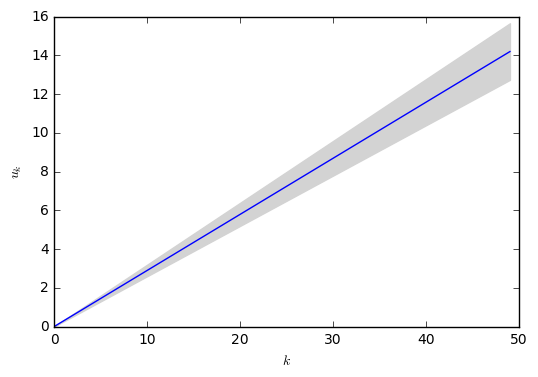

In [99]:
plt.figure()
xs = np.arange(50)
plt.fill_between(xs, xs * (m1.u - 1.96*m1.se), xs * (m1.u + 1.96*m1.se), color='lightgrey')
plt.plot(xs, xs * m1.u, '-b')
plt.xlabel(r"$k$")
plt.ylabel(r"$u_k$")

## 2) Degree Logit

In [100]:
# fit degree logit model
m2 = logit_individual.DegreeLogitModel('test', D=D, vvv=2)
m2.fit()

[test] fitting with BFGS
[test] i=  0 ll=35702.73098
[test] i= 10 ll=35635.95415
[test] i= 20 ll=35614.17897
[test] i= 30 ll=35606.96423
[test] i= 40 ll=35605.80830
[test] i= 50 ll=35605.66023
[test] i= 60 ll=35605.65924
[test] i= 70 ll=35605.65924
[test] parameters after fitting: [ 1.00000000e+00  1.00000000e+00 -9.69324061e-01 -7.59320320e-01
 -6.03597485e-01 -5.53642926e-01 -5.00133334e-01 -4.63157598e-01
 -4.16193029e-01 -3.91170094e-01 -3.93355854e-01 -3.25677706e-01
 -3.37897807e-01 -2.91529013e-01 -3.43162342e-01 -2.63067123e-01
 -2.28805552e-01 -1.73149460e-01 -1.99406916e-01 -1.71672284e-01
 -1.21229718e-01 -1.29956223e-01  3.34799057e-02  1.80635457e-02
  7.20494395e-02  6.05246346e-04 -3.06232109e-02  5.16520172e-02
 -2.84701702e-01 -7.08890054e-02  4.49175838e-02 -5.54363413e-02
  2.37517513e-01 -2.61103808e-01 -1.18465694e-01  4.94801151e-01
  9.91972227e-02  6.49935779e-02  5.29205358e-01  1.17845719e+00
  7.46646750e-01  2.45036554e-01  3.77317185e-01  1.44386253e+00
 -1

(0, 4)

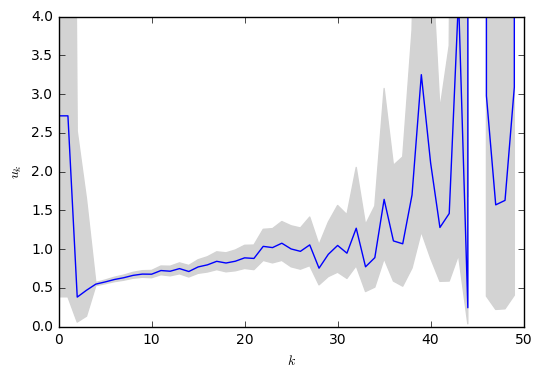

In [104]:
plt.figure()
xs = np.arange(51)
plt.fill_between(xs, np.exp(m2.u - 1.96*m2.se), np.exp(m2.u + 1.96*m2.se), color='lightgrey')
plt.plot(xs, np.exp(m2.u), '-b')
plt.xlabel(r"$k$")
plt.ylabel(r"$u_k$")
axes = plt.gca()
axes.set_ylim([0, 4])

The fit isn't great as there isn't much data in the higher degree region.

## 3) Mixed Logit

In [106]:
# fit mixed logit model
m3 = logit.MixedLogitModel('test', grouped=False, D=D, vvv=vvv)
m3.add_log_model()  # 'unclamped'
#m.add_log_model(bounds=((1, 1)),)  # 'clamped at alpha=1'
m3.add_poly_model(k=1, bounds=((1, 1),))  # uniform
T = m3.fit(etol=0.05, n_rounds=50, return_stats=True)

[test] [  0/ 50]  (1) pi_1=0.488 u_1=0.78 ll_1=16845.23  (2) pi_2=0.512 u_2=1.00 ll_2=18315.83  (*) tot_ll=35161.0589
[test] [  1/ 50]  (1) pi_1=0.484 u_1=0.68 ll_1=16857.38  (2) pi_2=0.516 u_2=1.00 ll_2=18462.50  (*) tot_ll=35319.8769
[test] [  2/ 50]  (1) pi_1=0.483 u_1=0.63 ll_1=16864.75  (2) pi_2=0.517 u_2=1.00 ll_2=18521.98  (*) tot_ll=35386.7267
[test] [  3/ 50]  (1) pi_1=0.482 u_1=0.61 ll_1=16868.79  (2) pi_2=0.518 u_2=1.00 ll_2=18547.92  (*) tot_ll=35416.7091
[test] [  4/ 50]  (1) pi_1=0.482 u_1=0.60 ll_1=16871.06  (2) pi_2=0.518 u_2=1.00 ll_2=18559.57  (*) tot_ll=35430.6229
[test] [  5/ 50]  (1) pi_1=0.482 u_1=0.59 ll_1=16872.43  (2) pi_2=0.518 u_2=1.00 ll_2=18564.76  (*) tot_ll=35437.1942
[test] [  6/ 50]  (1) pi_1=0.481 u_1=0.59 ll_1=16873.38  (2) pi_2=0.519 u_2=1.00 ll_2=18566.95  (*) tot_ll=35440.3267
[test] [  7/ 50]  (1) pi_1=0.481 u_1=0.59 ll_1=16874.11  (2) pi_2=0.519 u_2=1.00 ll_2=18567.72  (*) tot_ll=35441.8288
[test] [  8/ 50]  (1) pi_1=0.481 u_1=0.59 ll_1=16874.74 

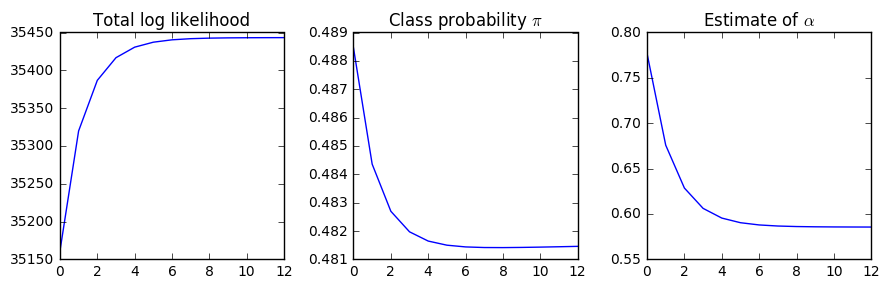

In [107]:
plt.figure(figsize=(9,3))

plt.subplot(131)
T.tot_ll.plot()
plt.title('Total log likelihood')

plt.subplot(132)
T.p1.plot()
plt.title(r'Class probability $\pi$')

plt.subplot(133)
T.u1.plot()
plt.title(r'Estimate of $\alpha$')

plt.tight_layout()

It converges quite quickly with respect to total log likelihood.
The class probability doesn't change at all, and stays at 0.48.
The estimate for $\alpha$ stops at 0.6.